In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [95]:
# Load the data from the provided CSV file
file_path = 'car_price_prediction.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

(         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
 0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
 1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
 2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
 3  45769185   3607   862         FORD   Escape        2011       Jeep   
 4  45809263  11726   446        HONDA      FIT        2014  Hatchback   
 
   Leather interior Fuel type Engine volume    Mileage  Cylinders  \
 0              Yes    Hybrid           3.5  186005 km        6.0   
 1               No    Petrol             3  192000 km        6.0   
 2               No    Petrol           1.3  200000 km        4.0   
 3              Yes    Hybrid           2.5  168966 km        4.0   
 4              Yes    Petrol           1.3   91901 km        4.0   
 
   Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
 0     Automatic          4x4  04-May        Left wheel  Silver

In [96]:
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 
                    'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
unique_values_dict = {}
for col in categorical_cols:
    print(len(df[col].unique()))
    unique_values_dict[col] = df[col].unique()
unique_values_dict

65
1590
11
2
7
4
3
2
16


{'Manufacturer': array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
        'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
        'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
        'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
        'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
        'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
        'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
        'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
        'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
        'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
        'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object),
 'Model': array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
        'Prius C aqua'], dtype=object),
 'Category': array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
        'Unive

# Preprocess data

In [97]:
# Deduplicate rows
df = df.drop_duplicates()

# Convert Levi to int and replace "-" with 0
df['Levy'] = df['Levy'].replace('-', 0).astype(int)

# Convert 'Mileage' from string to numeric
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)

# Label Encode 'Engine volume'
label_encoder = LabelEncoder()
df['Engine volume'] = label_encoder.fit_transform(df['Engine volume'])

# Correct data inconsistencies in 'Doors'
# Normalize 'Doors' column values like '>5'
df['Doors'] = df['Doors'].replace('04-May', '4-5').replace('>5', '5').str.split('-').apply(lambda x: int(x[0]))

# Convert 'Prod. year' to 'Car Age'
current_year = pd.Timestamp.now().year
df['Car Age'] = current_year - df['Prod. year']
df = df.drop('Prod. year', axis=1)

# Convert categorical columns to dummy variables
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 
                    'Gear box type', 'Drive wheels', 'Wheel', 'Color']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,ID,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Car Age,Manufacturer_ALFA ROMEO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399,63,186005.0,6.0,4,12,14,False,...,False,False,False,False,False,False,True,False,False,False
1,44731507,16621,1018,56,192000.0,6.0,4,8,13,False,...,False,False,False,False,False,False,False,False,False,False
2,45774419,8467,0,22,200000.0,4.0,4,2,18,False,...,False,False,False,False,False,False,False,False,False,False
3,45769185,3607,862,46,168966.0,4.0,4,0,13,False,...,False,False,False,False,False,False,False,False,True,False
4,45809263,11726,446,22,91901.0,4.0,4,4,10,False,...,False,False,False,False,False,False,True,False,False,False


In [98]:
# Remove outlier due to erroneous input
df = df[df['ID'] != 45812886]

# Remove cars with price <$500 because that is not realistic 
df = df[df['Price'] >= 500]

# Splitting the data for machine learning
X = df.drop(['Price', 'ID'], axis=1)  # Drop target and ID columns
y = df['Price']

In [99]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploratory 

In [7]:
import seaborn as sns

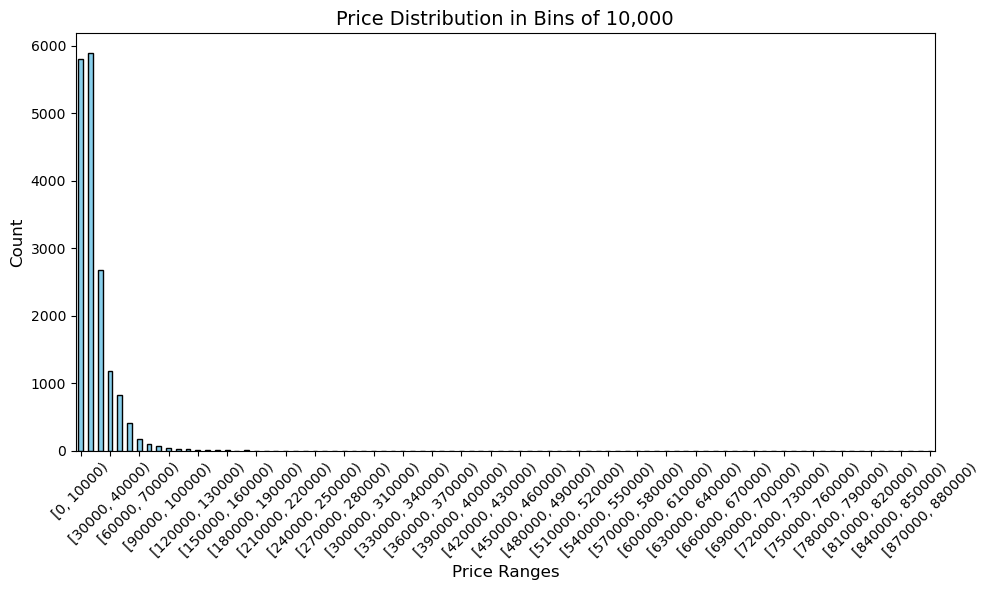

In [8]:
# Create bins of 10,000 and add a new column for the bins
bin_edges = range(0, int(df['Price'].max()) + 10000, 10000)
df['Price_Bin'] = pd.cut(df['Price'], bins=bin_edges, right=False)

# Count the occurrences in each bin
bin_counts = df['Price_Bin'].value_counts(sort=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the x-axis ticks to show every 3rd label
plt.xlabel('Price Ranges', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Price Distribution in Bins of 10,000', fontsize=14)
plt.xticks(ticks=range(len(bin_counts))[::3],  # Select every 3rd tick
           labels=[str(bin) for bin in bin_counts.index][::3], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
del df['Price_Bin']


In [8]:
df_graph = pd.read_csv(file_path)
df_graph = df_graph.drop_duplicates()
df_graph['Levy'] = df_graph['Levy'].replace('-', 0)
df_graph['Mileage'] = df_graph['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)
label_encoder = LabelEncoder()
df_graph['Engine volume'] = label_encoder.fit_transform(df_graph['Engine volume'])
df_graph['Doors'] = df_graph['Doors'].replace('04-May', '4-5').replace('>5', '5').str.split('-').apply(lambda x: int(x[0]))
current_year = pd.Timestamp.now().year
df_graph['Car Age'] = current_year - df_graph['Prod. year']
df_graph = df_graph.drop('Prod. year', axis=1)

# Drop categorical columns since they have too many categories to analyze
df_graph = df_graph.drop(columns=['Manufacturer', 'Model'])
categorical_cols = ['Category', 'Leather interior', 'Fuel type', 
                    'Gear box type', 'Drive wheels', 'Wheel', 'Color']
df_graph = pd.get_dummies(df_graph, columns=categorical_cols, drop_first=True)
df_graph = df_graph[df_graph['ID'] != 45812886]
df_graph = df_graph[df_graph['Price'] >= 500]
df_graph.head()

,ID,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Car Age,Category_Coupe,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399,63,186005.0,6.0,4,12,14,False,...,False,False,False,False,False,False,True,False,False,False
1,44731507,16621,1018,56,192000.0,6.0,4,8,13,False,...,False,False,False,False,False,False,False,False,False,False
2,45774419,8467,0,22,200000.0,4.0,4,2,18,False,...,False,False,False,False,False,False,False,False,False,False
3,45769185,3607,862,46,168966.0,4.0,4,0,13,False,...,False,False,False,False,False,False,False,False,True,False
4,45809263,11726,446,22,91901.0,4.0,4,4,10,False,...,False,False,False,False,False,False,True,False,False,False


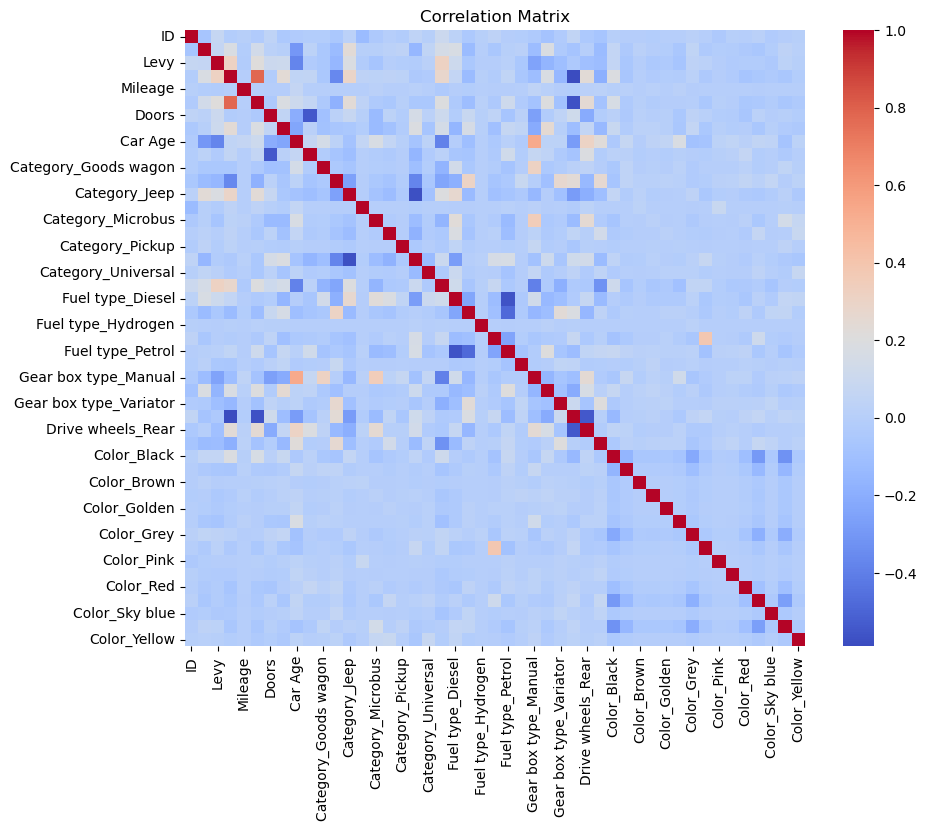

In [11]:
corr_matrix = df_graph.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [21]:
# Create a mask for values greater than 0.9
high_corr_pairs = corr_matrix.where(abs(corr_matrix) > 0.55)

# Print the pairs with high correlation
for col in high_corr_pairs.columns:
    for row in high_corr_pairs.index:
        if not pd.isna(high_corr_pairs.loc[row, col]) and row != col:
            print(f"High correlation between {row} and {col}: {high_corr_pairs.loc[row, col]}")


High correlation between Cylinders and Engine volume: 0.7778085041537457
High correlation between Drive wheels_Front and Engine volume: -0.5890286359706702
High correlation between Engine volume and Cylinders: 0.7778085041537457
High correlation between Drive wheels_Front and Cylinders: -0.566075443490034
High correlation between Category_Sedan and Category_Jeep: -0.5709284722449136
High correlation between Category_Jeep and Category_Sedan: -0.5709284722449136
High correlation between Fuel type_Petrol and Fuel type_Diesel: -0.5630567073925361
High correlation between Fuel type_Diesel and Fuel type_Petrol: -0.5630567073925361
High correlation between Engine volume and Drive wheels_Front: -0.5890286359706702
High correlation between Cylinders and Drive wheels_Front: -0.566075443490034


In [26]:
corr_matrix = df_graph.corr()
price_corr = corr_matrix['Price'].sort_values(ascending=False)
print(price_corr.iloc[0:-1])

Price                       1.000000
Category_Jeep               0.234198
Gear box type_Tiptronic     0.185966
Engine volume               0.178054
Fuel type_Diesel            0.172509
Leather interior_Yes        0.151122
Cylinders                   0.137185
Levy                        0.067284
Color_Black                 0.060727
Category_Universal          0.047873
Color_Grey                  0.046893
Color_White                 0.035451
Category_Pickup             0.034035
Category_Coupe              0.029516
Category_Minivan            0.024324
Doors                       0.022813
Color_Brown                 0.018755
Fuel type_Plug-in Hybrid    0.017065
Color_Yellow                0.007498
Fuel type_Petrol            0.005858
Airbags                     0.003044
Category_Limousine          0.002064
Category_Microbus           0.002024
Fuel type_Hydrogen          0.000604
Drive wheels_Rear          -0.002716
Color_Carnelian red        -0.011175
Color_Pink                 -0.014484
M

In [102]:
df_plot = pd.read_csv(file_path)
df_plot = df_plot[df_plot['ID'] != 45812886]
df_plot = df_plot[df_plot['Price'] >= 500]
label_encoder = LabelEncoder()
df_plot['Engine volume'] = label_encoder.fit_transform(df_plot['Engine volume'])
df_plot = df_plot.drop_duplicates()
current_year = pd.Timestamp.now().year
df_plot['Car Age'] = current_year - df_plot['Prod. year']
df_plot = df_plot.drop('Prod. year', axis=1)


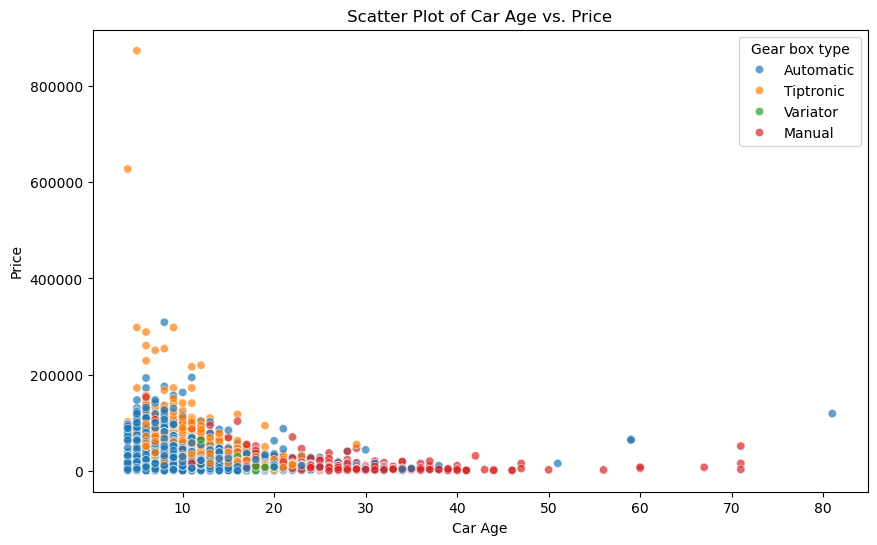

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='Car Age', y='Price', hue='Gear box type', alpha=0.7)
plt.title('Scatter Plot of Car Age vs. Price')
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.show()

From this graph, there is a peak of car prices around 6 years old with the general trend of newer cars being more expensive. Additionally, there is a visible timeline of different gear box types starting with manual -> variator -> tiptronic -> automatic. The automatic and tiptronic seem to have more expensive cars, with tiptronic more consistently pricey.

## Common Car Models (unused)

In [167]:
df_model = pd.read_csv(file_path)
# Deduplicate rows
df_model = df_model.drop_duplicates()

# Convert Levi to int and replace "-" with 0
df_model['Levy'] = df_model['Levy'].replace('-', 0)

# Convert 'Mileage' from string to numeric
df_model['Mileage'] = df_model['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)

# Label Encode 'Engine volume'
label_encoder = LabelEncoder()
df_model['Engine volume'] = label_encoder.fit_transform(df_model['Engine volume'])

# Correct data inconsistencies in 'Doors'
df_model['Doors'] = df_model['Doors'].replace('04-May', '4-5').replace('>5', '5').str.split('-').apply(lambda x: int(x[0]))

# Convert 'Prod. year' to 'Car Age'
current_year = pd.Timestamp.now().year
df_model['Car Age'] = current_year - df_model['Prod. year']
df_model = df_model.drop('Prod. year', axis=1)

# Convert categorical columns to dummy variables
categorical_cols_model = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 
                    'Gear box type', 'Drive wheels', 'Wheel', 'Color']
df_model = pd.get_dummies(df_model, columns=categorical_cols_model, drop_first=True)
df_model.head()

,ID,Price,Levy,Model,Engine volume,Mileage,Cylinders,Doors,Airbags,Car Age,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399,RX 450,63,186005.0,6.0,4,12,14,...,False,False,False,False,False,False,True,False,False,False
1,44731507,16621,1018,Equinox,56,192000.0,6.0,4,8,13,...,False,False,False,False,False,False,False,False,False,False
2,45774419,8467,0,FIT,22,200000.0,4.0,4,2,18,...,False,False,False,False,False,False,False,False,False,False
3,45769185,3607,862,Escape,46,168966.0,4.0,4,0,13,...,False,False,False,False,False,False,False,False,True,False
4,45809263,11726,446,FIT,22,91901.0,4.0,4,4,10,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Remove outlier due to erroneous input
df_model = df_model[df_model['ID'] != 45812886]
# df_model = df_model[df_model['Price'] < 400000]

# Remove cars with price <$500 because that is not realistic 
df_model = df_model[df_model['Price'] >= 500]

# Splitting the data for machine learning
X_model = df_model.drop(['Price', 'ID'], axis=1)  # Drop target and ID columns
y_model = df_model['Price']

# Split into training and testing sets
X_model_train, X_model_test, y_model_train, y_model_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)
# X_model2_train, X_model2_test, y_model2_train, y_model2_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

In [169]:
# Find the most common models in the training set
threshold = 0.8  # Adjust this to control how many models you keep
model_counts = X_model_train['Model'].value_counts(normalize=True)  # Get relative frequencies
popular_models = model_counts[model_counts.cumsum() <= threshold].index  # Top X% of models
len(popular_models)

126

In [ ]:
# Group models into 'Popular' or 'Other' based on training data
X_model_train['Model_Grouped'] = X_model_train['Model'].apply(lambda x: 'Popular' if x in popular_models else 'Other')
X_model_test['Model_Grouped'] = X_model_test['Model'].apply(lambda x: 'Popular' if x in popular_models else 'Other')
# # This one makes it so that you only care about the specific model if it is popular
# X_model2_train['Model_Grouped'] = X_model2_train['Model'].apply(lambda x: x if x in popular_models else 'Other')
# X_model2_test['Model_Grouped'] = X_model2_test['Model'].apply(lambda x: x if x in popular_models else 'Other')

# Optional: Drop the original 'Model' column if no longer needed
X_model_train = X_model_train.drop('Model', axis=1)
X_model_test = X_model_test.drop('Model', axis=1)

# Step 3: One-hot encode the new 'Model_Grouped' column
X_model_train = pd.get_dummies(X_model_train, columns=['Model_Grouped'], drop_first=True)
X_model_test = pd.get_dummies(X_model_test, columns=['Model_Grouped'], drop_first=True)

# Ensure both train and test have the same columns
X_model_test = X_model_test.reindex(columns=X_model_train.columns, fill_value=0)

# Display the processed data
print("Train Set Sample:")
print(X_model_train.head())

print("\nTest Set Sample:")
print(X_model_test.head())

Train Set Sample:
       Levy  Engine volume   Mileage  Cylinders  Doors  Airbags  Car Age  \
2760    639             36  103318.0        4.0      4        0       10   
12120     0             36  186000.0        4.0      4        6       20   
17410   687             28   89000.0        4.0      5        0       14   
16789  1047             28  180000.0        4.0      2        6       17   
17325  1714             63   39704.0        6.0      4       12        7   

       Manufacturer_ALFA ROMEO  Manufacturer_ASTON MARTIN  Manufacturer_AUDI  \
2760                     False                      False              False   
12120                    False                      False              False   
17410                    False                      False              False   
16789                    False                      False              False   
17325                    False                      False              False   

       ...  Color_Grey  Color_Orange  Color_

In [147]:
# # Save preprocessed data for reuse
# X_train.to_csv('X_train_preprocessed.csv', index=False)
# X_test.to_csv('X_test_preprocessed.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# Model

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

## Baseline

In [ ]:
average_price = round(float(df["Price"].mean()), 2)
baseline_pred = np.array([average_price for _ in range(len(y_test))])
mae_baseline = mean_absolute_error(y_test, baseline_pred)
mae_baseline

12498.088808559862

## Model 2

In [100]:
# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("MAE on training set:", mae_train)
print("MAE on test set:", mae_test)

MAE on training set: 1665.1883306048817
MAE on test set: 4421.169995318052


In [ ]:
# model = RandomForestRegressor(random_state=42)
# model.fit(X_model_train, y_model_train)
# y_train_pred = model.predict(X_model_train)
# y_test_pred = model.predict(X_model_test)
# mae_train = mean_absolute_error(y_model_train, y_train_pred)
# mae_test = mean_absolute_error(y_model_test, y_test_pred)
# print("MAE on training set:", mae_train)
# print("MAE on test set:", mae_test)

## Model 3

In [18]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
print(numeric_columns)
print(df.dtypes['Levy'],df.dtypes['Mileage'],df.dtypes['Airbags'],df.dtypes['Car Age']) 
# print(df['Levy'].unique())
non_numeric_values = df['Levy'][~df['Levy'].astype(str).str.isnumeric()].unique()
print(non_numeric_values)

Index(['ID', 'Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Doors',
       'Airbags', 'Car Age'],
      dtype='object')


In [ ]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Make predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)
# Evaluate the model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
# Print results
print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)
print("R² Score on Test Set:", r2_test)
print(linear_model.score(X_train,y_train))
print(linear_model.score(X_test,y_test))
# Optional: Feature importance for linear regression (coefficients)
# coefficients = pd.DataFrame({
#     'Feature': X.columns,
#     'Coefficient': linear_model.coef_
# }).sort_values(by='Coefficient', ascending=False)
# print(coefficients.iloc[0:-1])

Training MAE: 7306.659998606815
Testing MAE: 9028.595827944599
R² Score on Test Set: 0.23790628746544462
0.6154875179543469
0.23790628746544462


In [ ]:
# Log-transform Ridge
y_train_log = np.log1p(y_train)  # Use log1p to handle zeros safely
y_test_log = np.log1p(y_test)

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train_log)

y_train_pred_log = ridge_model.predict(X_train)
y_test_pred_log = ridge_model.predict(X_test)

y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)
print("R² Score on Test Set:", r2_test)
# Testing MAE: 8832     c=1


c:\Users\windy\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.77526e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Training MAE: 7875.429881159881
Testing MAE: 8832.068181390423
R² Score on Test Set: 0.23291550245632764


In [ ]:
# Log-transform Ridge Scale doesn't seem to improve score, but gets rid of the warning
y_train_log = np.log1p(y_train)  # Use log1p to handle zeros safely
y_test_log = np.log1p(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train_log)

y_train_pred_log = ridge_model.predict(X_train_scaled)
y_test_pred_log = ridge_model.predict(X_test_scaled)

y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)
print("R² Score on Test Set:", r2_test)
# Testing MAE: 8832     c=1


Training MAE: 7463.717660737155
Testing MAE: 9057.338762218142
R² Score on Test Set: 0.1928066583326299


In [ ]:
# Use the most correlated features, polynomal, y_log, and ridge model 
y_train_log = np.log1p(y_train)  # Use log1p to handle zeros safely

correlation_matrix = X_train.corrwith(y_train).abs().sort_values(ascending=False)
top_features = correlation_matrix.head(22).index.tolist()

X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

poly_reduced = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly_reduced = poly_reduced.fit_transform(X_train_reduced)
X_test_poly_reduced = poly_reduced.transform(X_test_reduced)

model_reduced = Ridge(alpha=1)
model_reduced.fit(X_train_poly_reduced, y_train_log)

y_train_pred_reduced = model_reduced.predict(X_train_poly_reduced)
y_test_pred_reduced = model_reduced.predict(X_test_poly_reduced)
y_train_pred = np.expm1(y_train_pred_reduced)
y_test_pred = np.expm1(y_test_pred_reduced)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)
print("R² Score on Test Set:", r2_test)
# train mae=7796, test mae=8262, r2=0.3614    corr=22   poly=2
# train mae=7192, test mae=7737, r2=0.4478    corr=22   poly=3

c:\Users\windy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\windy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Training MAE: 7192.277837361574
Testing MAE: 7737.640474443496
R² Score on Test Set: 0.4478158077696438
